# <center> EDA on preprocessed data (store-sales data) </center>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm.notebook import tqdm as tqdm
import statsmodels.api as sm
import gc
plt.style.use('fivethirtyeight')
from pylab import rcParams
import random
import seaborn as sns

In [73]:
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)

In [74]:
plt.rcParams['figure.figsize'] = [10, 5]
#plt.rcParams['figure.figsize'] = [18, 8]

In [75]:
# This function will pick a random color for the graph calling this function.This function will pick a random color for the graph calling this function.

def random_color():
    colors = ["blue","black","brown","red","yellow","green","orange","turquoise","magenta","cyan"]
    random.shuffle(colors)
    return colors[0]


In [76]:
ca1 = pd.read_csv('preprocessed_data/CA_1_sales_data.csv')
ca2 = pd.read_csv('preprocessed_data/CA_2_sales_data.csv')
ca3 = pd.read_csv('preprocessed_data/CA_3_sales_data.csv')
ca4 = pd.read_csv('preprocessed_data/CA_4_sales_data.csv')

tx1 = pd.read_csv('preprocessed_data/TX_1_sales_data.csv')
tx2 = pd.read_csv('preprocessed_data/TX_2_sales_data.csv')
tx3 = pd.read_csv('preprocessed_data/TX_3_sales_data.csv')

wi1 = pd.read_csv('preprocessed_data/WI_1_sales_data.csv')
wi2 = pd.read_csv('preprocessed_data/WI_2_sales_data.csv')
wi3 = pd.read_csv('preprocessed_data/WI_3_sales_data.csv')

calendar = pd.read_csv('preprocessed_data/calendar_processed-May-13-2022.csv')
#sell_prices = pd.read_csv('walmart_sales_data/sell_prices.csv')

In [77]:
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head(5))
    print()
    
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print()
    
    print("-------------------------------Describe----------------------------------")
    print(df.describe())
    print()
    
    print("-------------------------------Columns-----------------------------------")
    print(df.columns)
    print()
    
    print("-------------------------------Data Types--------------------------------")
    print(df.dtypes)
    print()
    
    print("----------------------------Missing Values-------------------------------")
    print(df.isnull().sum())
    print()
    
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print()
    
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)
    print()
    
    print("============================================================================ \n")

In [79]:
# renaming 'Unnamed: 0' column to 'date', for better understanding

ca1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca4.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [101]:
ca1.head()

,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,cpi,unemployment_rate,gas_price,snap_ca,ca_walmart,ca_hobbies,ca_household,ca_foods,store_sales,median_price,min_price,max_price
0,2011-01-29,11101,1,1,2011,None,None,None,None,221.187,9.1,3.163,0,39.50,20.14,36.5,63.00,4337.0,3.18,0.2,20.0
1,2011-01-30,11101,2,1,2011,None,None,None,None,221.187,9.1,3.163,0,42.50,30.02,29.0,67.90,4155.0,3.18,0.2,20.0
2,2011-01-31,11101,3,1,2011,None,None,None,None,221.187,9.1,3.155,0,36.50,22.42,48.0,60.90,2816.0,3.18,0.2,20.0
3,2011-02-01,11101,4,2,2011,None,None,None,None,221.898,9.0,3.155,1,42.40,19.08,38.5,62.70,3051.0,3.18,0.2,20.0
4,2011-02-02,11101,5,2,2011,None,None,None,None,221.898,9.0,3.155,1,38.69,21.96,35.2,57.42,2630.0,3.18,0.2,20.0


In [80]:
#To plot graphs for sales of different stores

def sales(sales_df):
    sales_df['date'] = pd.to_datetime(sales_df['date'])
    sales_df =sales_df.groupby('date')['store_sales'].sum().reset_index()
    sales_df = sales_df.set_index('date')
    return sales_df

In [98]:
#This function will decompose the given time series into three part

from itertools import cycle, islice
def decompose(y):
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.show()

## <center> STORE WISE SALES TIME SERIES</center>

### CA1

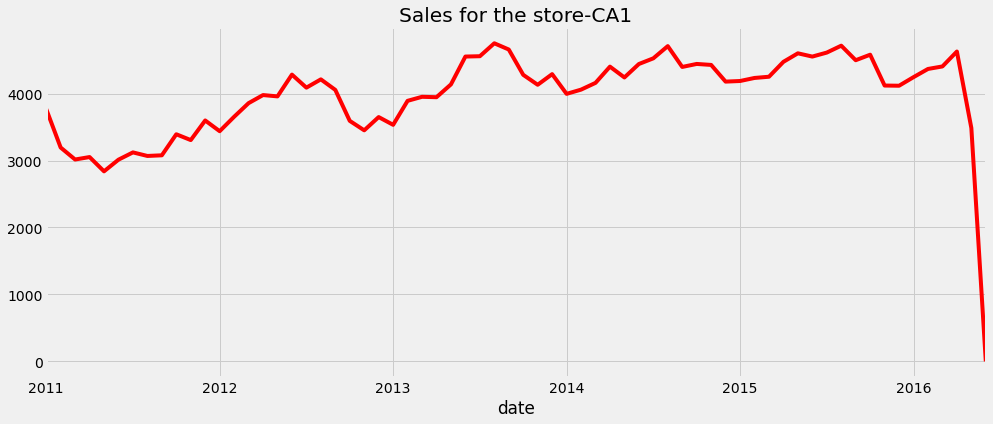

In [99]:
df = sales(ca1) # create a dataframe for the state CA
y_ca1 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_ca1.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-CA1"))
plt.ylabel = ("Sales")
plt.show()

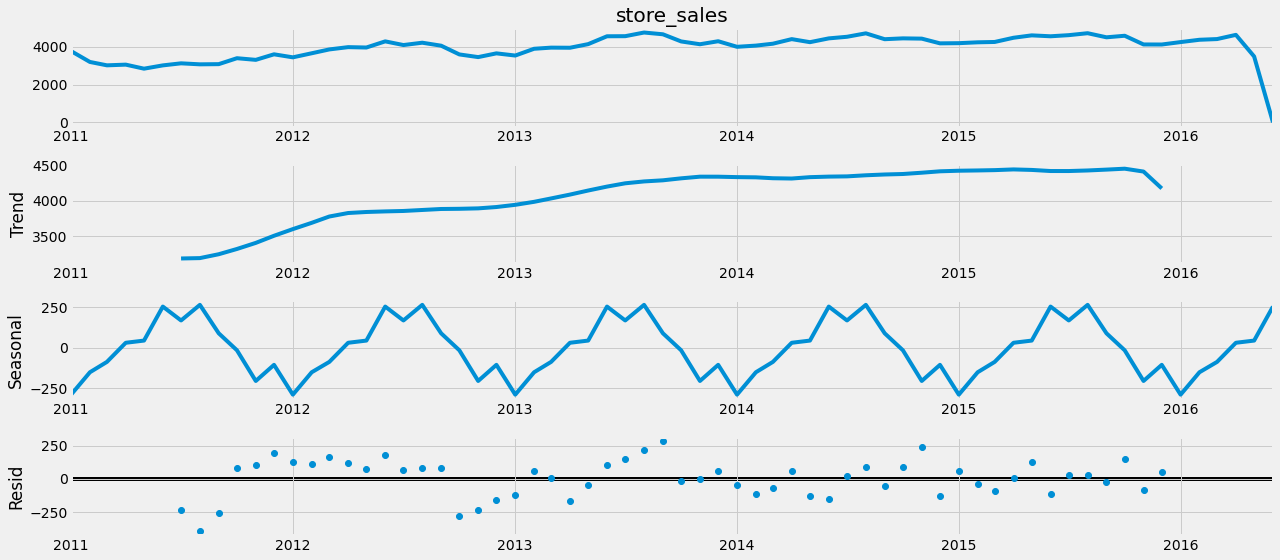

In [100]:
decompose(y_ca1)

### CA2

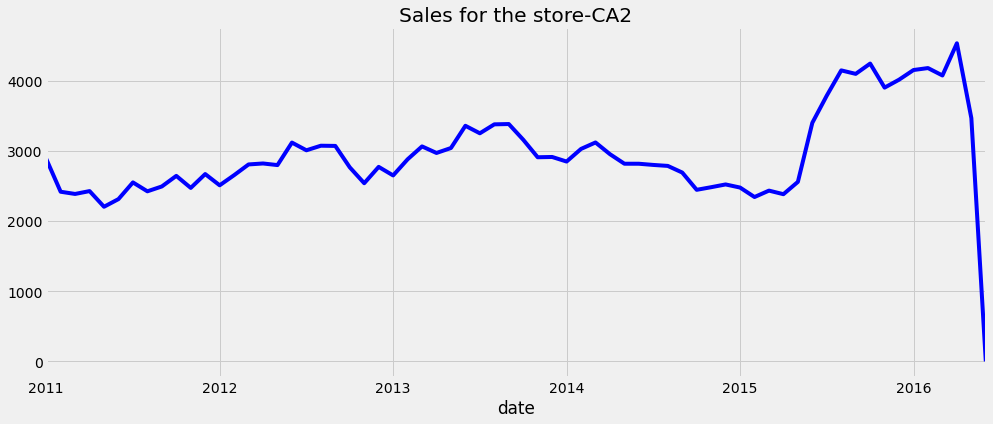

In [44]:
df = sales(ca2) # create a dataframe for the state CA
y_ca2 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_ca2.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-CA2"))
plt.ylabel = ("Sales")
plt.show()

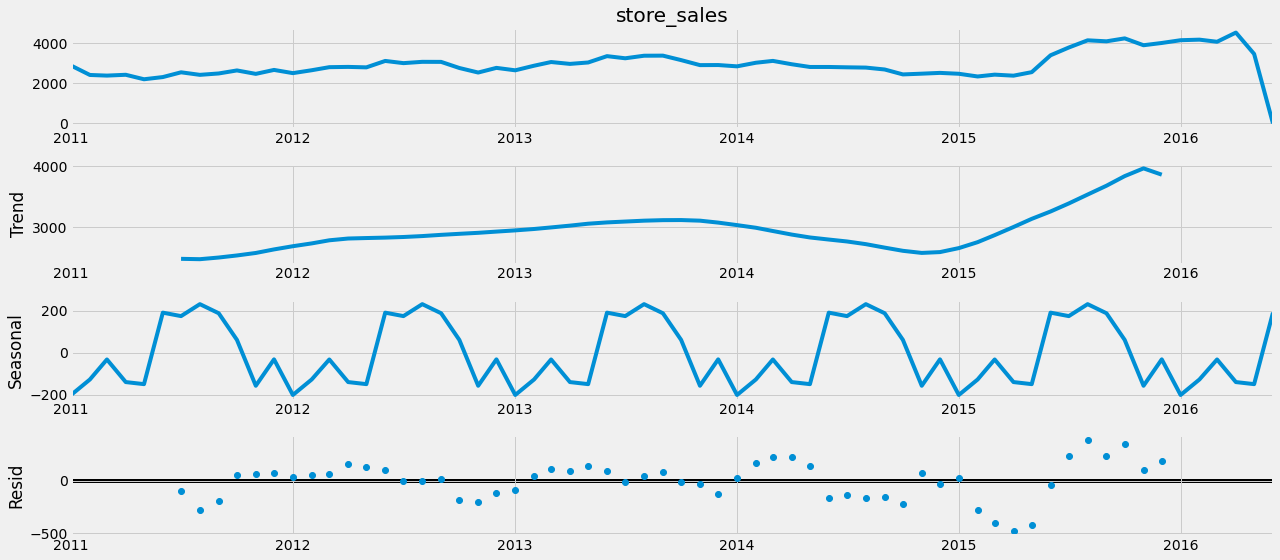

In [45]:
decompose(y_ca2)

### CA3

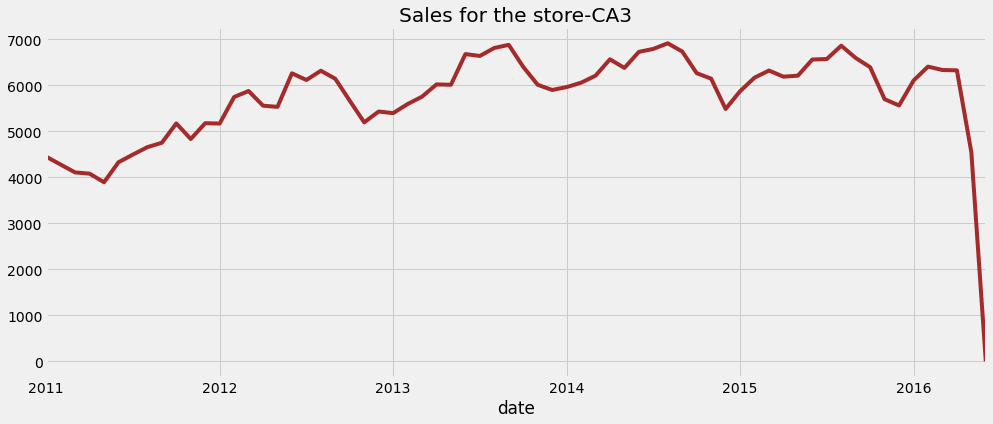

In [47]:
df = sales(ca3) # create a dataframe for the state CA
y_ca3 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_ca3.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-CA3"))
plt.ylabel = ("Sales")
plt.show()

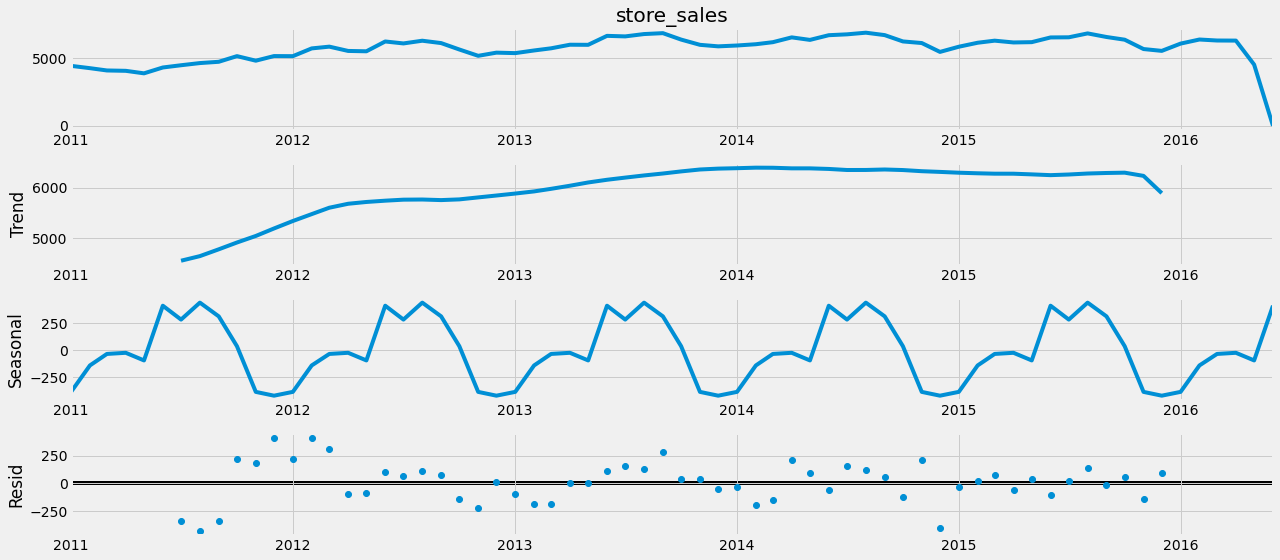

In [48]:
decompose(y_ca3)

### CA4

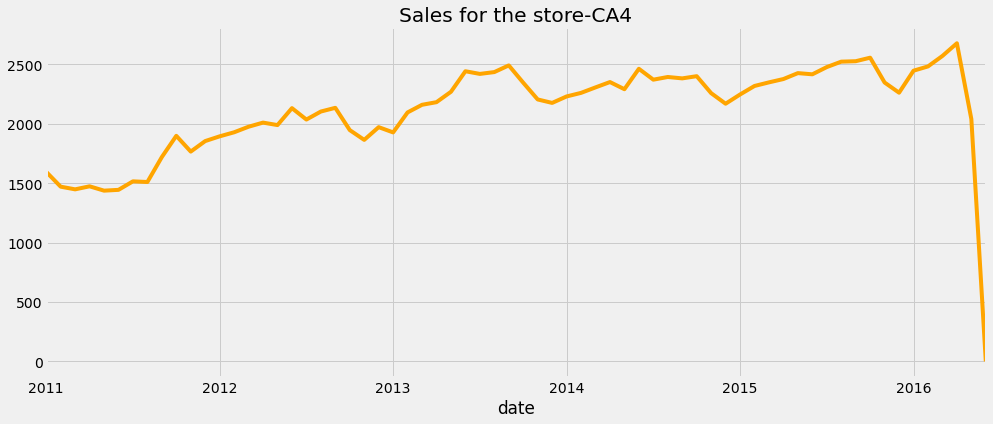

In [49]:
df = sales(ca4) # create a dataframe for the state CA
y_ca4 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_ca4.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-CA4"))
plt.ylabel = ("Sales")
plt.show()

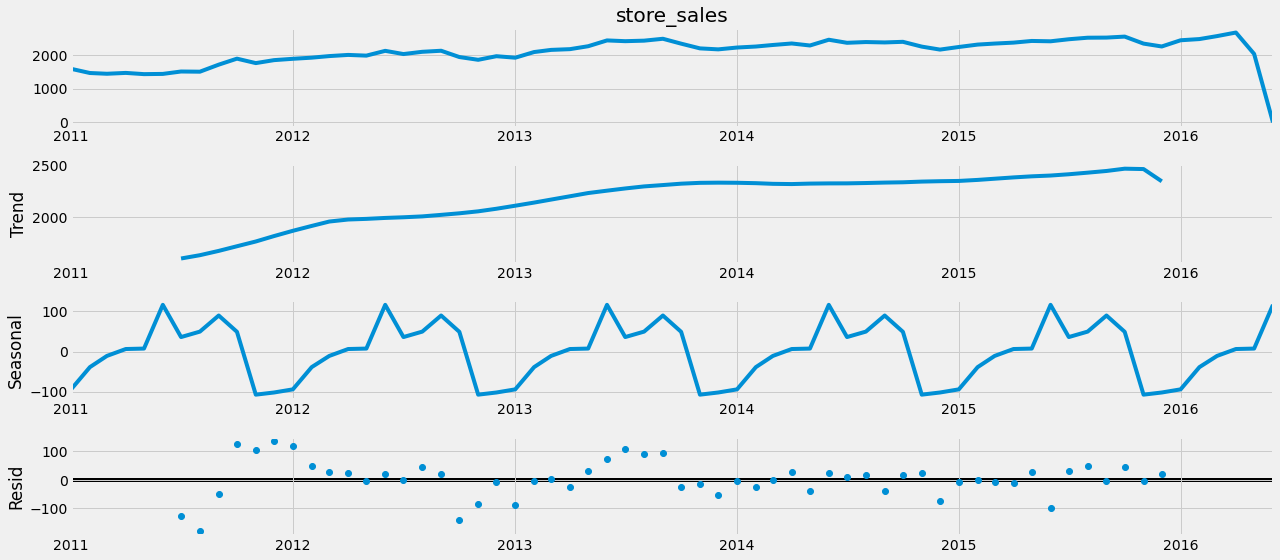

In [50]:
decompose(y_ca4)

### TX1

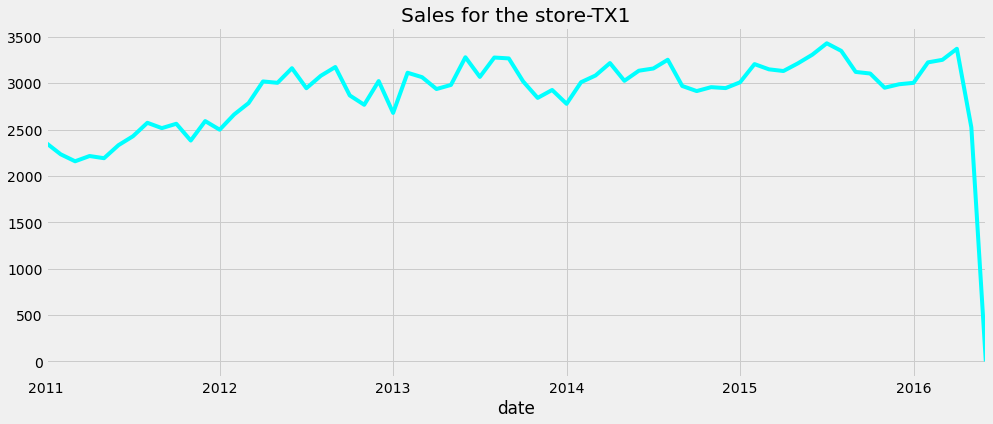

In [51]:
df = sales(tx1) # create a dataframe for the state CA
y_tx1 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_tx1.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-TX1"))
plt.ylabel = ("Sales")
plt.show()

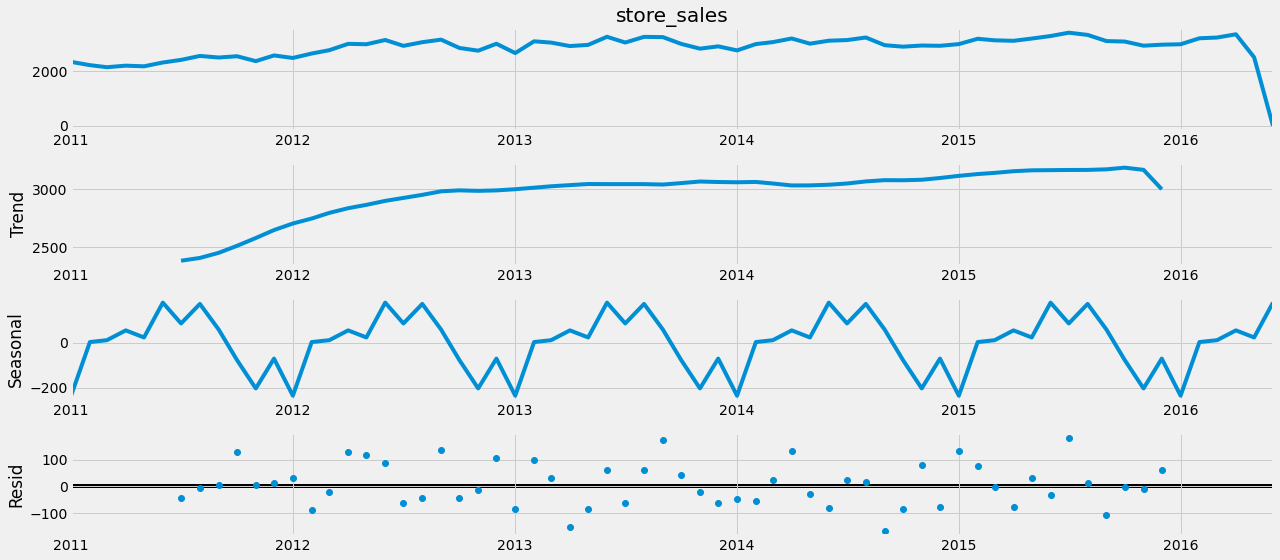

In [52]:
decompose(y_tx1)

### TX2

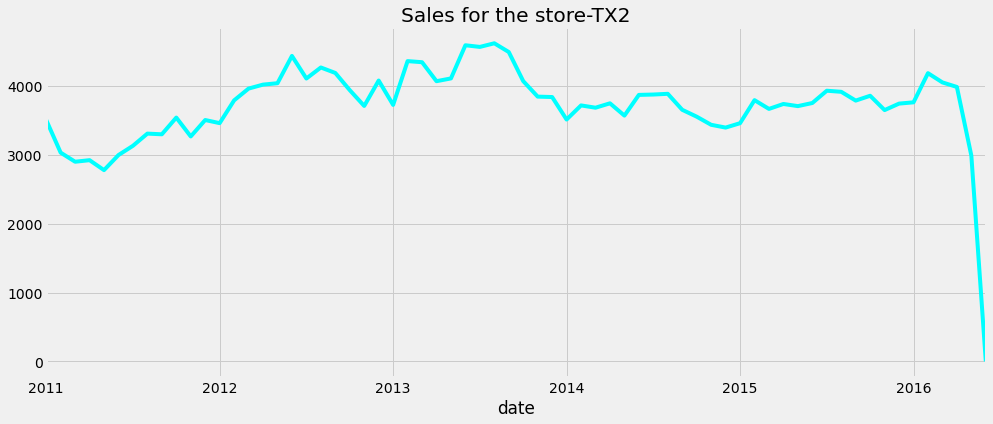

In [54]:
df = sales(tx2) # create a dataframe for the state CA
y_tx2 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_tx2.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-TX2"))
plt.ylabel = ("Sales")
plt.show()

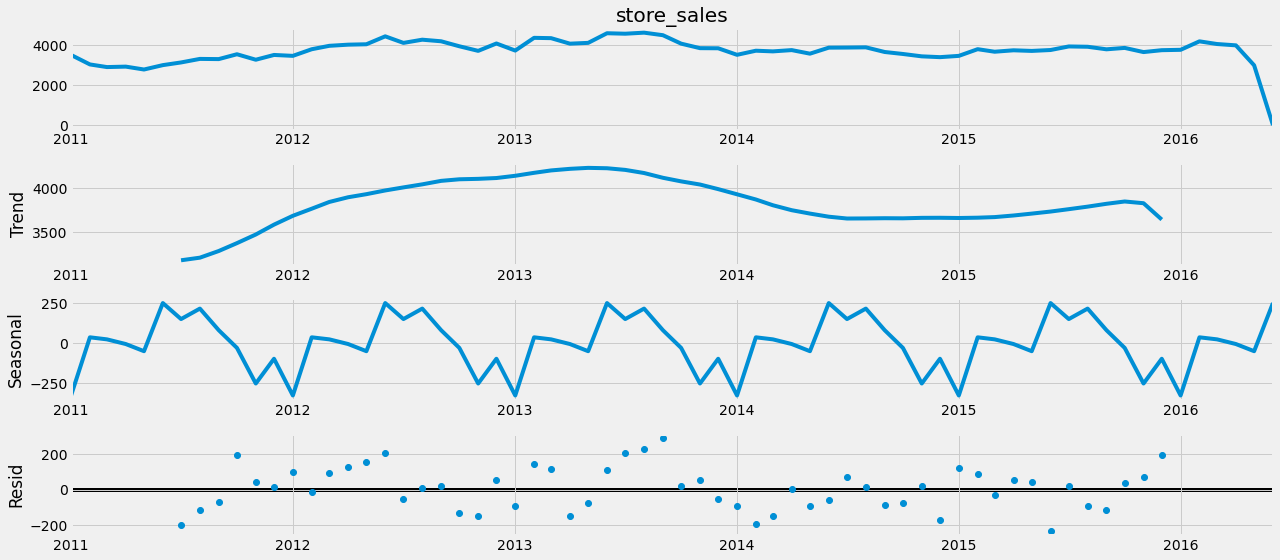

In [55]:
decompose(y_tx2)

### TX3

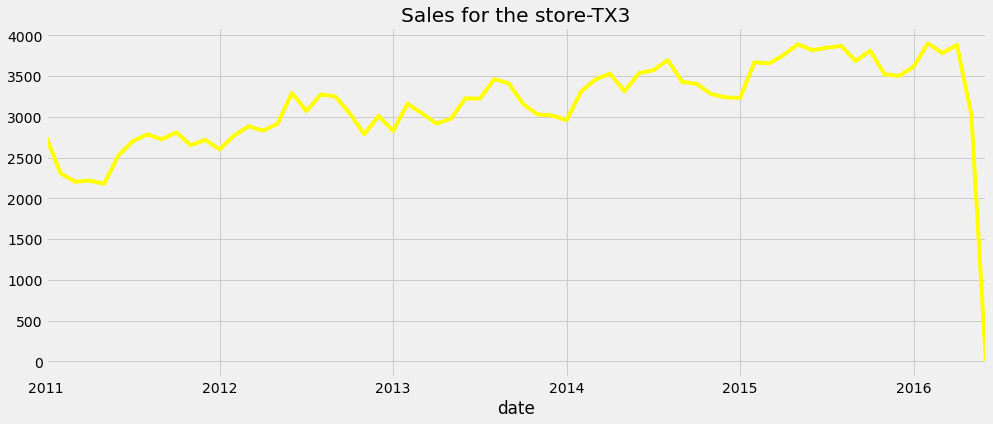

In [58]:
df = sales(tx3) # create a dataframe for the state CA
y_tx3 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_tx3.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-TX3"))
plt.ylabel = ("Sales")
plt.show()

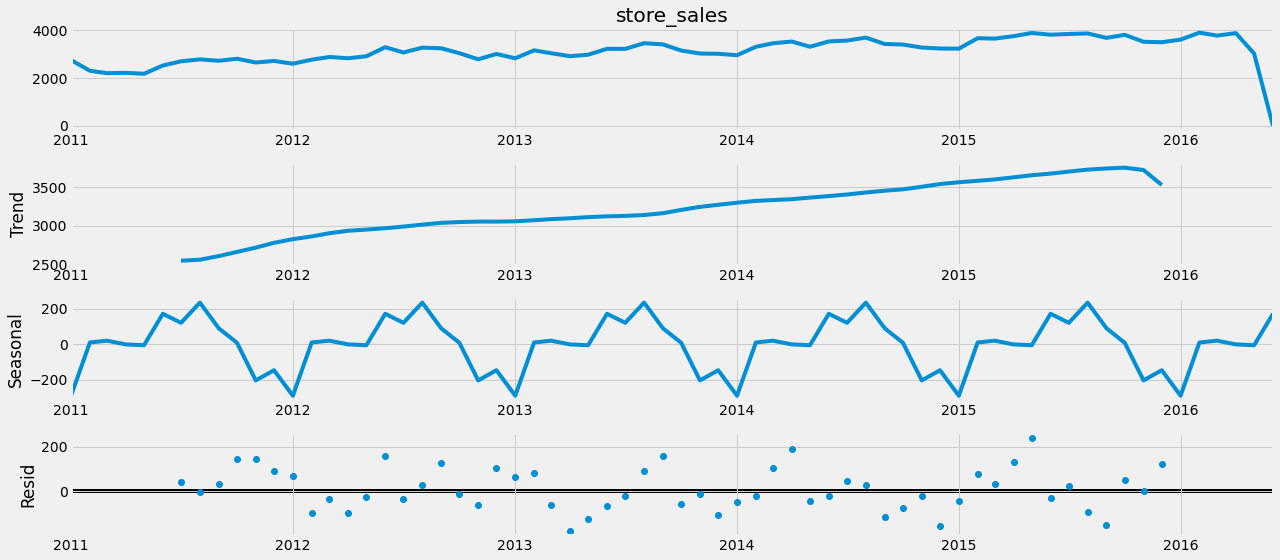

In [59]:
decompose(y_tx3)

### WI1

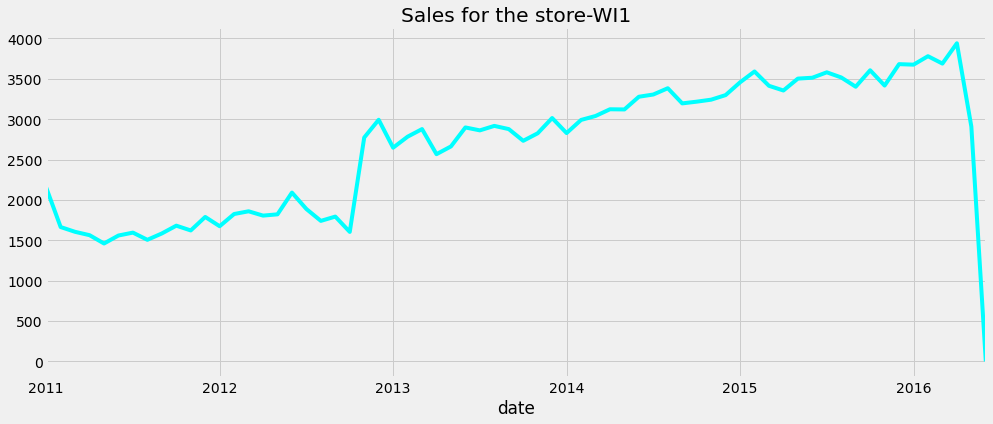

In [61]:
df = sales(wi1) # create a dataframe for the state CA
y_wi1 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_wi1.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-WI1"))
plt.ylabel = ("Sales")
plt.show()

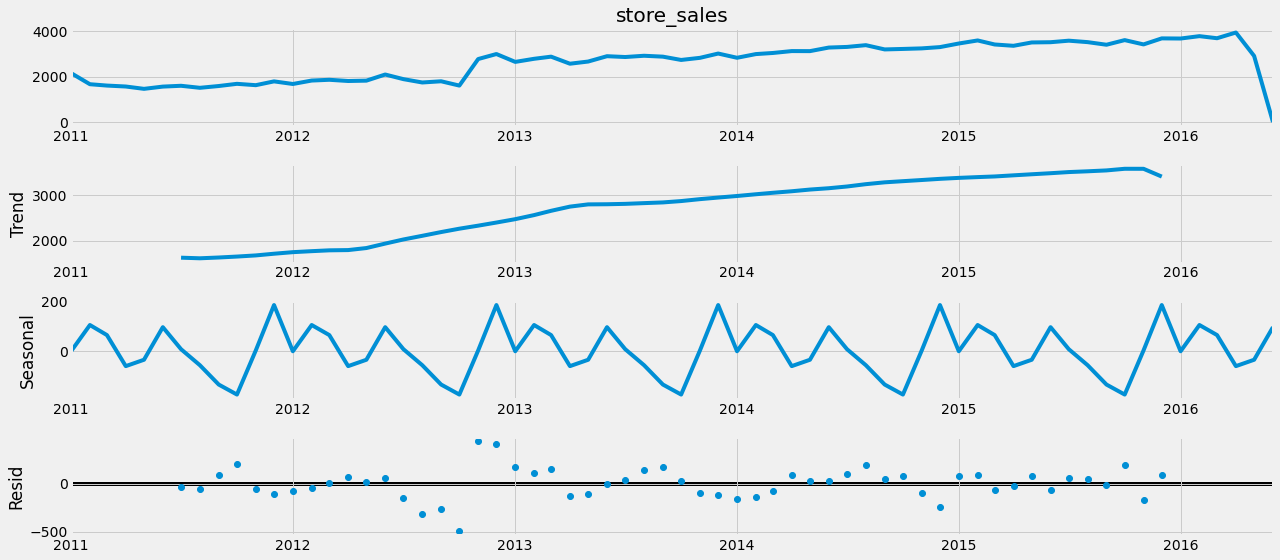

In [62]:
decompose(y_wi1)

### WI2

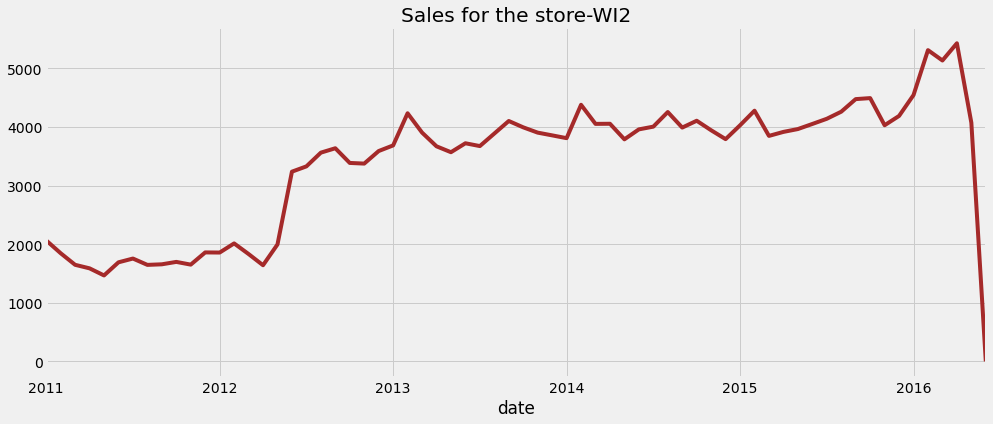

In [65]:
df = sales(wi2) # create a dataframe for the state CA
y_wi2 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_wi2.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-WI2"))
plt.ylabel = ("Sales")
plt.show()

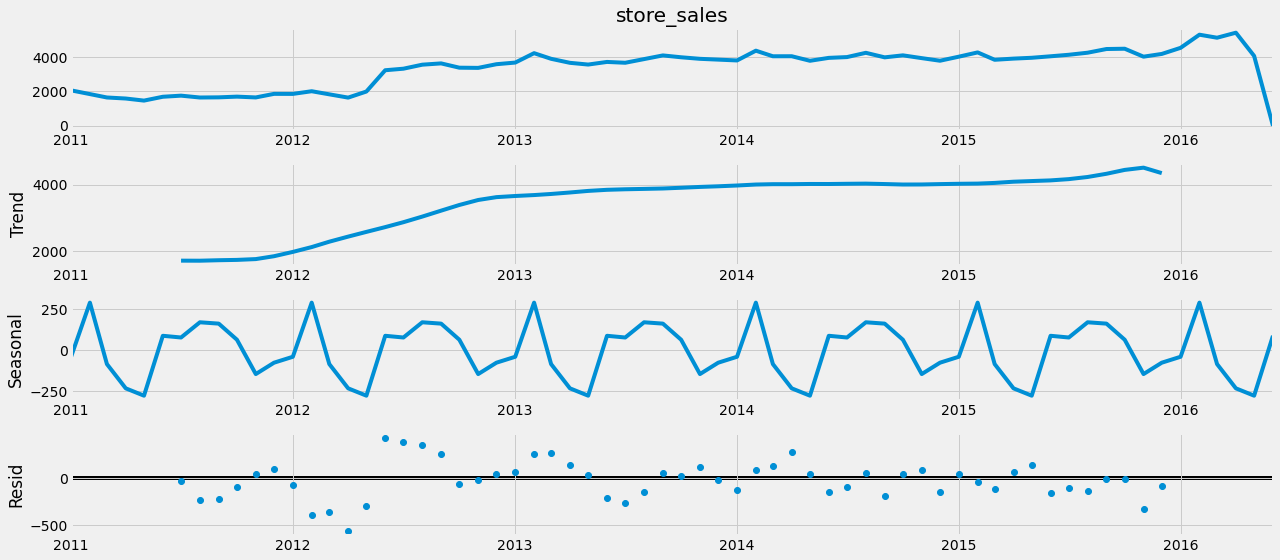

In [66]:
decompose(y_wi2)

### WI3

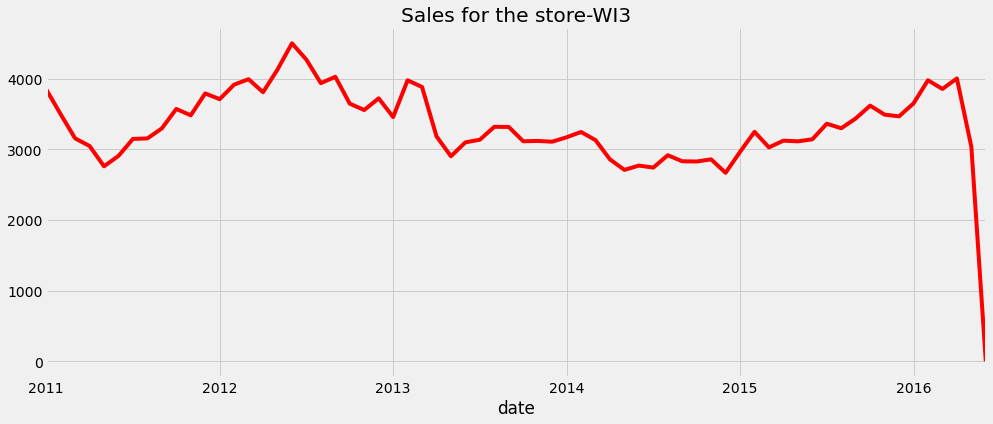

In [67]:
df = sales(wi3) # create a dataframe for the state CA
y_wi3 = df['store_sales'].resample('MS').mean() # taking monthly average
colour = random_color()
y_wi3.plot(figsize=(15, 6),color = colour,title = ("Sales for the store-WI3"))
plt.ylabel = ("Sales")
plt.show()

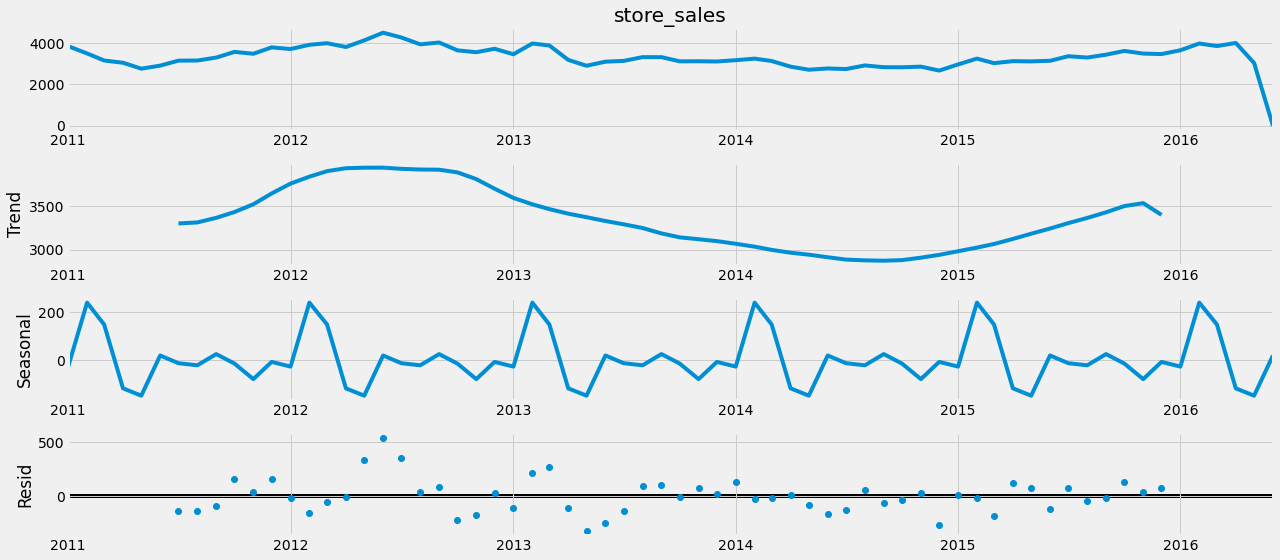

In [68]:
decompose(y_wi3)